In [315]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import numpy as np
import matplotlib.pyplot as plt

In [316]:
initial_x = 0  #Initial worth in quatloos (The results you see at the end are for this initial_x.)
# initial_x = 800000.0
# initial_x = 50000.0
# initial_x = 1000000.0

sal = 60000.0 #salary

# Set up the grid 

t_min = 0
t_max = 30
x_min = 0.0
x_max = 8000000.0 

delta_t = 1.0
delta_x = 10000.0

N_t = int((t_max - t_min)/delta_t + 1.0000001)
N_x = int((x_max - x_min)/delta_x + 1.0000001)
N_u = 4 # Four possible investments

t = np.zeros(N_t)
x = np.zeros(N_x)

for i in range(N_t):
    t[i] = t_min + i*delta_t
for j in range(N_x):
    x[j] = x_min + j*delta_x


In [317]:
# Determine New_money[i,j,k], which is the amount of money you will have after year i if you start year i
# with x[j] quatloos and use investment k that year.

New_money = np.zeros((N_t,N_x,N_u)) # The money you have after you invest that year (due to investment choice)

policy_money= np.zeros((N_t,N_x,N_u))

def investmentchoice(policy_money,k): #function
    if k==0:  # Fred's Bank
        return policy_money + 40000
    elif k==1:  # The Bank of Marcus
        if (policy_money>=90010):
            return policy_money - 90000
        else:
            return 10
    elif k==2:  # Bito Wladon's Sound Investments
        return policy_money * 1.05 
    elif k==3:  # Wellington Financial Management and Investments
        return policy_money * 0.85 

for i in range (N_t):
    for j in range (N_x):
        for k in range (N_u):
            if (0<=i and i<5) or (i>=20 and i<25): #Plutocrats
                if x[j]>1000000:
                    policy_money = x[j]+100000
                elif (x[j]>50000 and x[j]<=1000000):
                    policy_money= x[j]-50000
                elif (x[j]<=50000):
                    policy_money=0
                       
            if (5<=i and i<10) or (i>=15 and i<20): #revolutionaries
                if i==5 or i==15: #year 1 of rev rule
                    if x[j]>1000000:
                        policy_money= 10000
                    elif (x[j]>100000 and x[j]<=1000000): #no change
                        policy_money= x[j]
                    elif (x[j]<=100000):
                        policy_money=x[j]+900000
                if i==6 or i==16: #year 2 of rev rule
                    if x[j]>900000 and x[j]<=1000000:
                        policy_money= 10000
                    else: #no change
                        policy_money= x[j]
                if i==7 or i==17: #year 3 of rev rule
                    if x[j]>800000 and x[j]<=900000:
                        policy_money= 10000
                    else: #no change
                        policy_money= x[j]
                if i==8 or i==18: #year 4 of rev rule
                    if x[j]>700000 and x[j]<=800000:
                        policy_money= 10000
                    else: #no change
                        policy_money= x[j]
                if i==9 or i==19: #year 5 of rev rule
                    policy_money=x[j]+100000
                        
            if (10<=i and i<15) or (i>=25 and i<30): #middletarians
                if i==10 or i==25:
                    if x[j]>1000000:
                        policy_money= x[j]-900000
                    elif (x[j]>100000 and x[j]<=1000000):
                        policy_money= x[j]+900000
                    else: 
                        policy_money= x[j]
                else:
                    policy_money=x[j]
            policy_money = policy_money + sal
            New_money[i,j,k]= investmentchoice(policy_money,k)




#Then convert New_money to New_index, the index (possibly fractional) for the wealth corresponding to New_money.

New_index = np.zeros((N_t,N_x,N_u)) # Note this is a float, not an integer. It indicates the number of 10,000 
                                    # quatloos owned. So if New_money = $73,000, then New_index = 7.3.
                                    # New_index = 7.3 puts it between index 7 and 8, since x[7]=7 and x[8]=8.
                                    # New_index is defined by the next line of code.

New_index = np.maximum(0,np.minimum(New_money/delta_x, N_x-2))


In [318]:
# Backwards in time pass: Determine the Value function (keeping track of the optimal strategy)

V = np.zeros((N_t,N_x))  # Value function
alpha = np.zeros(N_u)  # Interpolation factor
Utility = np.zeros(N_u) # The optimal utilty is the value function
Opt_u_index = np.zeros((N_t,N_x)).astype('int')  # Optimal investment strategy u to use

#Value at the final time
V[N_t-1,:] = x[:]

#Main loop
for i in range(N_t-2,-1,-1): #time
    for j in range(N_x): #money
        alpha[:] = New_index[i,j,:] - New_index[i,j,:].astype("int")
        Utility[:] = (1-alpha[:])*V[i+1,New_index[i,j,:].astype("int")] + \
                       alpha[:]*V[i+1,New_index[i,j,:].astype("int")+1]  # We interpolate between the two
                                                                         # closest wealth grid points.
        V[i,j] = np.max(Utility)
        Opt_u_index[i,j] = np.argmax(Utility)
           


The optimal final worth at time 30 is $3,108,000 quatloos.
The value function result: 3201245.650013948



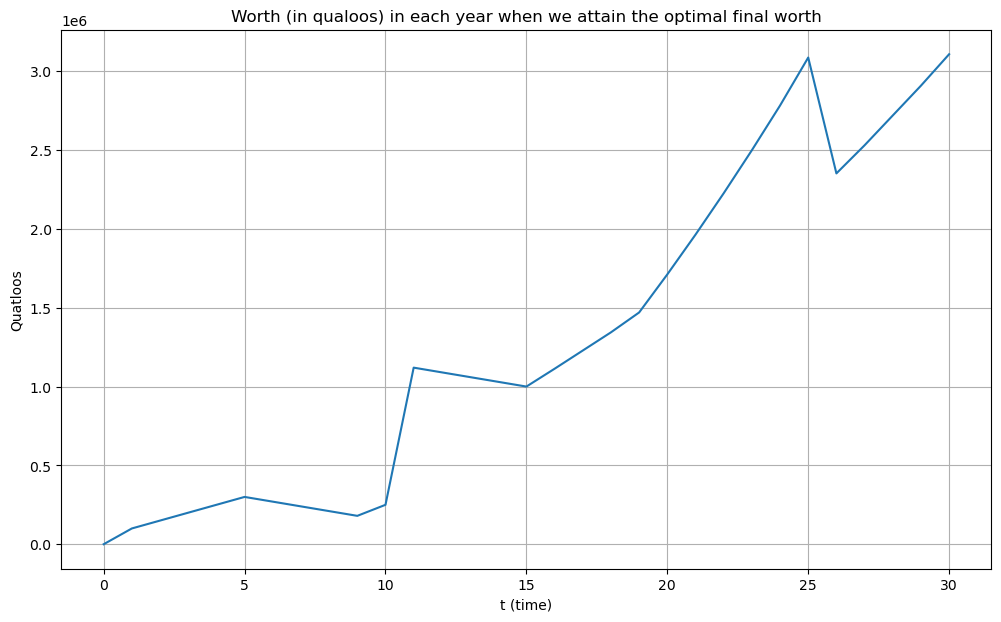

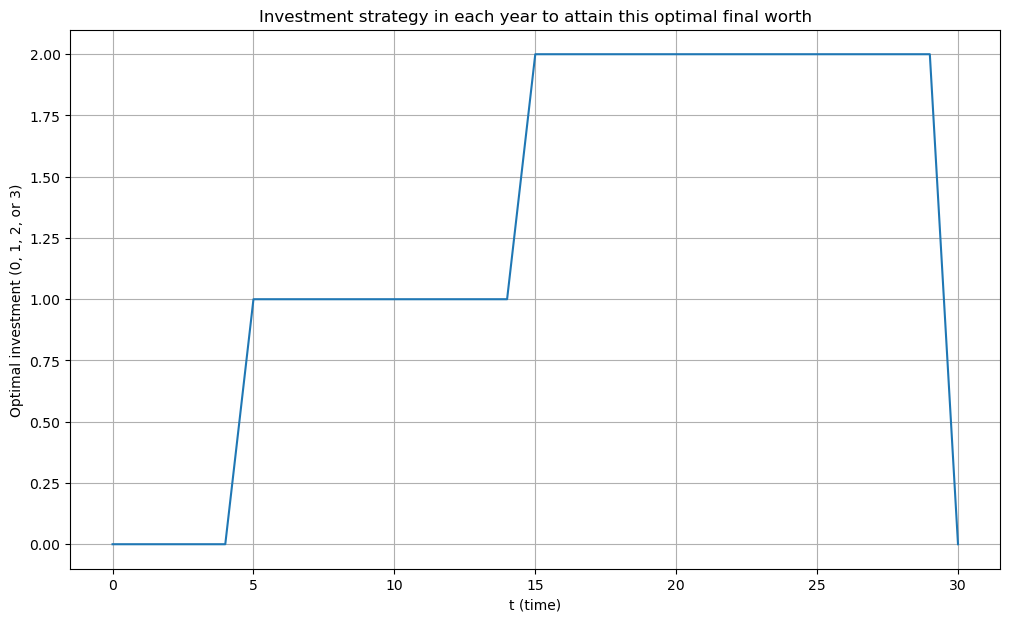

At time 0 you have $0 quatloos. It is optimal to use Fred's Bank.
At time 1 you have $100,000 quatloos. It is optimal to use Fred's Bank.
At time 2 you have $150,000 quatloos. It is optimal to use Fred's Bank.
At time 3 you have $200,000 quatloos. It is optimal to use Fred's Bank.
At time 4 you have $250,000 quatloos. It is optimal to use Fred's Bank.
At time 5 you have $300,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 6 you have $270,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 7 you have $240,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 8 you have $210,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 9 you have $180,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 10 you have $250,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 11 you have $1,120,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 12 you have $1,090,000 quatloos. It is optimal to use The Bank Of Marcus.
At time

In [319]:
# Forwards in time pass: Determining the solution from the optimal strategy.

x_plot = np.zeros(N_t) # x_plot is the number of quatloos each year following the optimal investment strategy
u_plot = np.zeros(N_t).astype("int") # u_plot is the optimal investment strategy followed each year

#Initial condition 
x_plot[0] = initial_x
u_plot[0] = Opt_u_index[0,int(max(0,min(x_plot[0]/delta_x, N_x-2)) + .99999)]  # rounds up the x index if its 
                                                                               # proximity to an integer can't 
                                                                               # be explained by machine 
                                                                               # precision error.
# Determine x_plot and u_plot for all other times.
for i in range(N_t-1):
    #x_plot[i+1]=New_money[i, int(np.round(x_plot[i]/delta_x)),u_plot[i]]
    x_plot[i+1]=New_money[i, int(max(0,min(x_plot[i]/delta_x, N_x-2))),u_plot[i]]
    u_plot[i+1]=Opt_u_index[i+1, int(max(0,min(x_plot[i+1]/delta_x, N_x-2))+.99999)]


# Print out results
    
print("")
print("The optimal final worth at time", int(t[N_t-1]),"is ${:,.0f} quatloos.".format(x_plot[N_t-1]))
print("The value function result:", V[0,int(initial_x/delta_x)])
print("")

plt.figure(figsize=(12, 7), dpi=100)
plt.plot(t, x_plot)
plt.title('Worth (in qualoos) in each year when we attain the optimal final worth')
plt.xlabel('t (time)'); plt.ylabel('Quatloos')
plt.grid()
plt.show()

plt.figure(figsize=(12, 7), dpi=100)
plt.plot(t, u_plot)
plt.title('Investment strategy in each year to attain this optimal final worth')
plt.xlabel('t (time)'); plt.ylabel('Optimal investment (0, 1, 2, or 3)')
plt.grid()
plt.show()

for i in range(N_t-1):
    if u_plot[i]==0:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Fred's Bank.".format(x_plot[i]))
    if u_plot[i]==1:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use The Bank Of Marcus.".format(x_plot[i]))
    if u_plot[i]==2:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Bito Wladon's Sound Investments.".format(x_plot[i])) 
    if u_plot[i]==3:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Wellington Financial Management and Investments.".format(x_plot[i]))
print("At time", int(t[N_t-1]),"you have ${:,.0f} quatloos.".format(x_plot[N_t-1]))

